<a href="https://colab.research.google.com/github/Walid-Ahmed/Google-Tensorflow-Certificate/blob/master/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) Build and train neural network models using TensorFlow 2.x

❏ Use TensorFlow 2.x.
❏ Build, compile and train machine learning (ML) models using TensorFlow.
❏ Preprocess data to get it ready for use in a model.
❏ Use models to predict results.
❏ Build sequential models with multiple layers.
❏ Build and train models for binary classification.
❏ Build and train models for multi-class categorization.
❏ Plot loss and accuracy of a trained model.
❏ Identify strategies to prevent overfitting, including augmentation and dropout.
❏ Use pretrained models (transfer learning).
❏ Extract features from pre-trained models.
❏ Ensure that inputs to a model are in the correct shape.
❏ Ensure that you can match test data to the input shape of a neural network.
❏ Ensure you can match output data of a neural network to specified input shape for test data.
❏ Understand batch loading of data.
❏ Use callbacks to trigger the end of training cycles.
❏ Use datasets from different sources.
❏ Use datasets in different formats, including json and csv.
❏ Use datasets from tf.data.datasets.

 # Image classification Skill list

❏ Define Convolutional neural networks with Conv2D and pooling layers. 

❏ Build and train models to process real-world image datasets.

❏ Understand how to use convolutions to improve your neural network.

❏ Use real-world images in different shapes and sizes..

❏ Use image augmentation to prevent overfitting.

❏ Use ImageDataGenerator.

❏ Understand how ImageDataGenerator labels images based
 on the directory structure.

#Import Statments

In [16]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  imageio import  imread
import random

print("Packages imported")

Packages imported


es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)

# Important Functions

In [ ]:
    augmentationLevel=0
    
    if(augmentationLevel==2):

        train_datagen = ImageDataGenerator(
              rescale=1./255,   #All images will be rescaled by 1./255
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')
   
    elif(augmentationLevel==1):
        train_datagen = ImageDataGenerator(
        rotation_range=15,
        fill_mode="nearest",
        rescale=1./255, )

    else:    
        train_datagen = ImageDataGenerator(
                  rescale=1./255,   #All images will be rescaled by 1./255
                  )

In [ ]:
def pltHistoryCurve(history,key):
  values = history.history[key]
  epochs = range(len(values))
  plt.plot(epochs, values, 'b', label='Training '+key)
  plt.legend([key])
  plt.xlabel("Epochs")
  plt.ylabel("Value")
  plt.show()


In [ ]:
def pltHistoryCurveWSkip(history,key,skip=0):
  values = history.history[key]
  epochs = range(len(values))
  values=values[skip:]
  epochs=epochs[skip:]
  plt.plot(epochs, values, 'b', label='Training '+ key)
  plt.show()

In [14]:
def pltHistoryTwoKeys(history,key1,key2):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  value1=history.history[key1]
  value2=history.history[key2]

  epochs=range(len(value1)) # Get number of epochs

  #------------------------------------------------
  # Plot MAE and Loss
  #------------------------------------------------
  plt.plot(epochs, value1, 'r')
  plt.plot(epochs, value2, 'b')
  plt.title(key1 +' and '+ key2)
  plt.xlabel("Epochs")
  plt.ylabel("Value")
  plt.legend([key1,key2])

  plt.figure()

  

In [ ]:
def pltHistoryTwoKeysWSkip(history,key1,key2,skip):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  value1=history.history[key1]
  value2=history.history[key2]

  epochs=range(len(value1)) # Get number of epochs


  epochs = epochs[skip:]
  value1 = value1[skip:]
  value2 = value2[skip:]

  #------------------------------------------------
  # Plot Zoomed MAE and Loss
  #------------------------------------------------
  plt.plot(epochs, value1, 'r')
  plt.plot(epochs, value2, 'b')
  plt.title(key1 + " and "+key2)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend([key1,key2])

  plt.figure()

In [ ]:
def drarwGridOfImages(dataSetDir,fileNameToSaveImage=None, display=True):


  info=""
  #print(dataSetDir)


  #print(train_label1_fnames[:10])
  #print(train_label2_fnames[:10])
  imagePaths = sorted(list(list_images(dataSetDir)))

  firstImage=imagePaths[0]
  firstImage= imread(firstImage)
  #print(firstImage.shape)
  channels=len(firstImage.shape)


  if (channels==2):
    channels=1


  # Parameters for our graph; we'll output images in a 4x4 configuration
  nrows = 4
  ncols = 4

  pic_index = 0 # Index for iterating over images

  #display a batch of 4*4 pictures

  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8
  random.shuffle(imagePaths)
  imagePaths=imagePaths[0:16]
  #print(imagePaths)
  #print("channels={}".format(channels))



  for i, img_path in enumerate(imagePaths):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    if (channels==3):
      try:
        img = mpimg.imread(img_path)

        #print("[MSG]  read image from file {}".format(img_path))

      except:  
        print("[Error]  Can not read image from file{}".format(img_path))
        pass


    else:
      try:
        img=Image.open(img_path).convert('L')
        #img = img.resize((48,48))

        #print(type(img))
        
      except:  
        print("[Error]  Can not read image from file{}".format(img_path))

    #print("Attempting to show image {} from ".format(img_path))
    plt.imshow(img)  #draws an image on the current figure
    #cmap='gray', vmin=0, vmax=255
 

  if(fileNameToSaveImage != None):
    plt.savefig(fileNameToSaveImage)
    print("Image saved to {}  ".format(fileNameToSaveImage))


  
  if(display):  
    try:
      print(matplotlib.get_backend())

      plt.show()   #displays the figure (and enters the mainloop of whatever gui backend you're using). You shouldn't call it until you've plotted things and want to see them displayed.
    except:

      pass
      #print("ERROR")

  

  #return info,channels


In [ ]:
image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff",".ppm")


def list_images(basePath, contains=None):
    # return the set of files that are valid
    return list_files(basePath, validExts=image_types, contains=contains)


def list_files(basePath, validExts=None, contains=None):
    # loop over the directory structure
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # loop over the filenames in the current directory
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue

            # determine the file extension of the current file
            ext = filename[filename.rfind("."):].lower()

            # check to see if the file is an image and should be processed
            if validExts is None or ext.endswith(validExts):
                # construct the path to the image and yield it
                imagePath = os.path.join(rootDir, filename)
                yield imagePath


# Sample Models

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], activation=None), 
])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),

    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)           

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

# Example: House Price Prediction (simple, linear equation)


So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.


In [ ]:
def house_model(y_new):
    #xs = np.asarray([0,1,2,3,4,5,6,7,9,10])
    xs = np.array([0,  1, 2, 3, 4, 5], dtype=float)

    #ys = 50000 + 50000*xs 
    ys = 0.5 + 0.5*xs 


    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], activation=None), 

])
    
    

    
    
    model.summary()

    model.compile(optimizer="sgd", loss="mean_squared_error")
    model.fit(xs,ys,batch_size = 2, epochs = 100,verbose=0)
    return model.predict(y_new)[0]

In [ ]:
prediction = house_model([7.0])
print(prediction)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[3.9901578]


# MNIST. with  DNN


 MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        val_accuracy= logs['val_accuracy']
        if(val_accuracy>=0.98):
          print("Reached 98% accuracy so cancelling training!")
          self.model.stop_training = True


    

In [ ]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE


x_train=x_train/255
x_test=x_test/255

model = tf.keras.models.Sequential([    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

myCallBack=CustomCallback()


In [ ]:
history=model.fit(x_train, y_train,epochs=10, validation_data=(x_test, y_test),callbacks=[myCallBack])
model.summary()

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0816 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.0817 - val_accuracy: 0.9787
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0759 - val_accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0895 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0852 - val_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.0808 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0823 - val_accuracy:

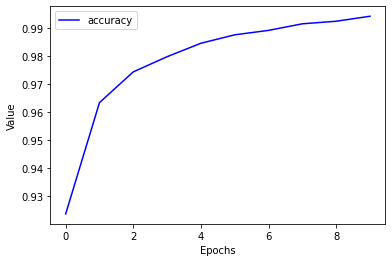

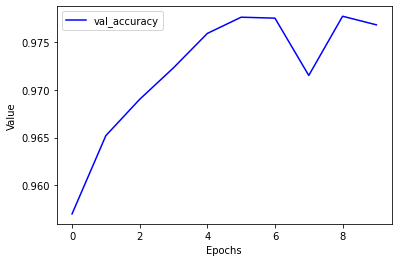

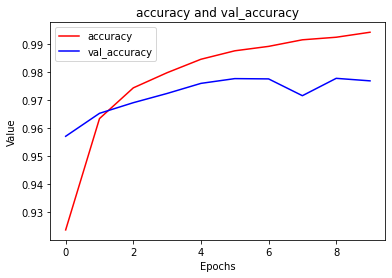

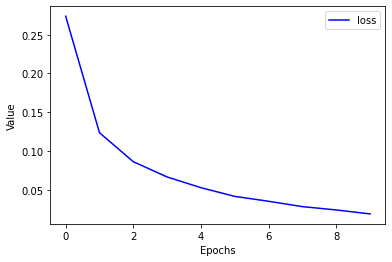

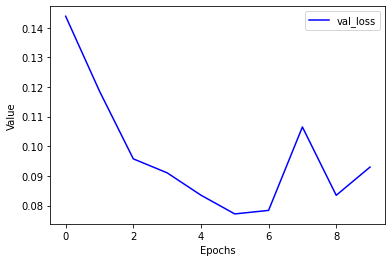

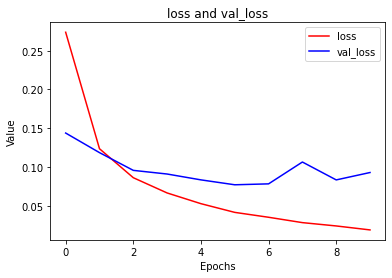

<Figure size 432x288 with 0 Axes>

In [ ]:
pltHistoryCurve(history,"accuracy")
pltHistoryCurve(history,"val_accuracy")
pltHistoryTwoKeys(history,"accuracy","val_accuracy")
pltHistoryCurve(history,"loss")
pltHistoryCurve(history,"val_loss")
pltHistoryTwoKeys(history,"loss","val_loss")

# New Section

# MNIST   with CNN


In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs=None):
        #keys = list(logs.keys())
        #print(keys)
        accuracy= logs['acc']
        if(accuracy>=0.98):
          print("Reached 98% accuracy so cancelling training!")
          self.model.stop_training = True


In [ ]:


mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
x_train=training_images/255
x_test=test_images/255
y_train=training_labels
y_test=test_labels

x_train=np.expand_dims(x_train, axis=-1)
x_test=np.expand_dims(x_test, axis=-1)

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPool2D(2,2),        
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),        
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(10, activation='sigmoid')])
model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])
myCallBack=CustomCallback()
# model fitting
history = model.fit( x_train,y_train,epochs=10 , callbacks=[myCallBack] , validation_data=(x_test, y_test))

    



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

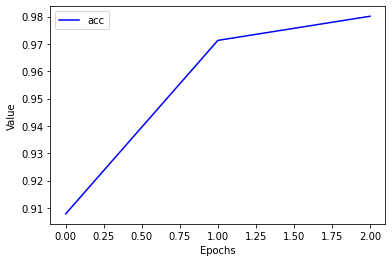

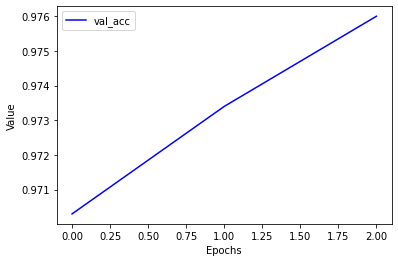

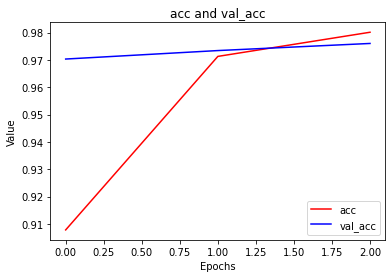

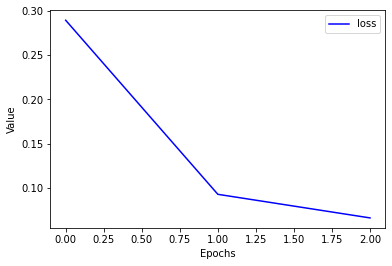

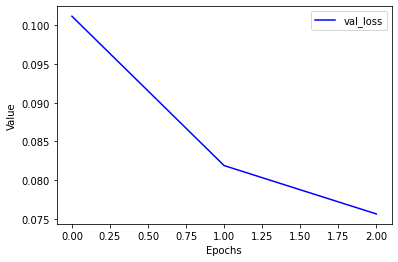

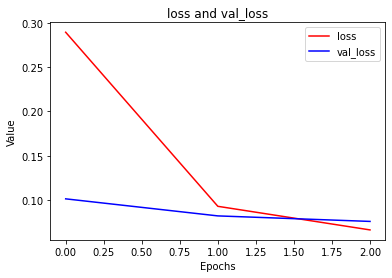

<Figure size 432x288 with 0 Axes>

In [ ]:
pltHistoryCurve(history,"acc")
pltHistoryCurve(history,"val_acc")
pltHistoryTwoKeys(history,"acc","val_acc")
pltHistoryCurve(history,"loss")
pltHistoryCurve(history,"val_loss")
pltHistoryTwoKeys(history,"loss","val_loss")

# Sad vs Happy using data generator

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [ ]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        #keys = list(logs.keys())
        #print(keys)
        accuracy= logs['acc']
        if(accuracy>=0.999):
          print("Reached DESIRED_ACCURACY accuracy so cancelling training!".format(DESIRED_ACCURACY))
          self.model.stop_training = True
myCallBack = CustomCallback()

--2020-10-04 03:39:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-10-04 03:39:08 (218 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



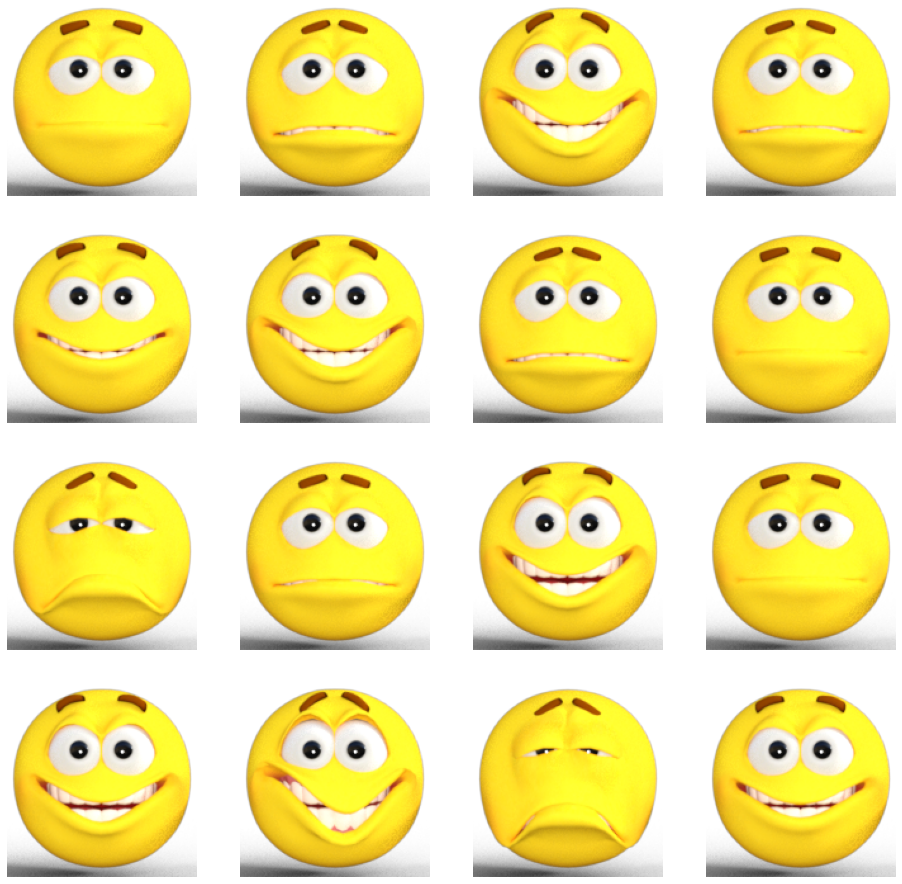

In [ ]:
BS=32
input_shape=32,32
train_dir="/tmp/h-or-s"
import os
NUM_TRAIN_IMAGES = sum([len(files) for r, d, files in os.walk(train_dir)])
EPOCHS=20
width,height=150,150
drarwGridOfImages(train_dir)

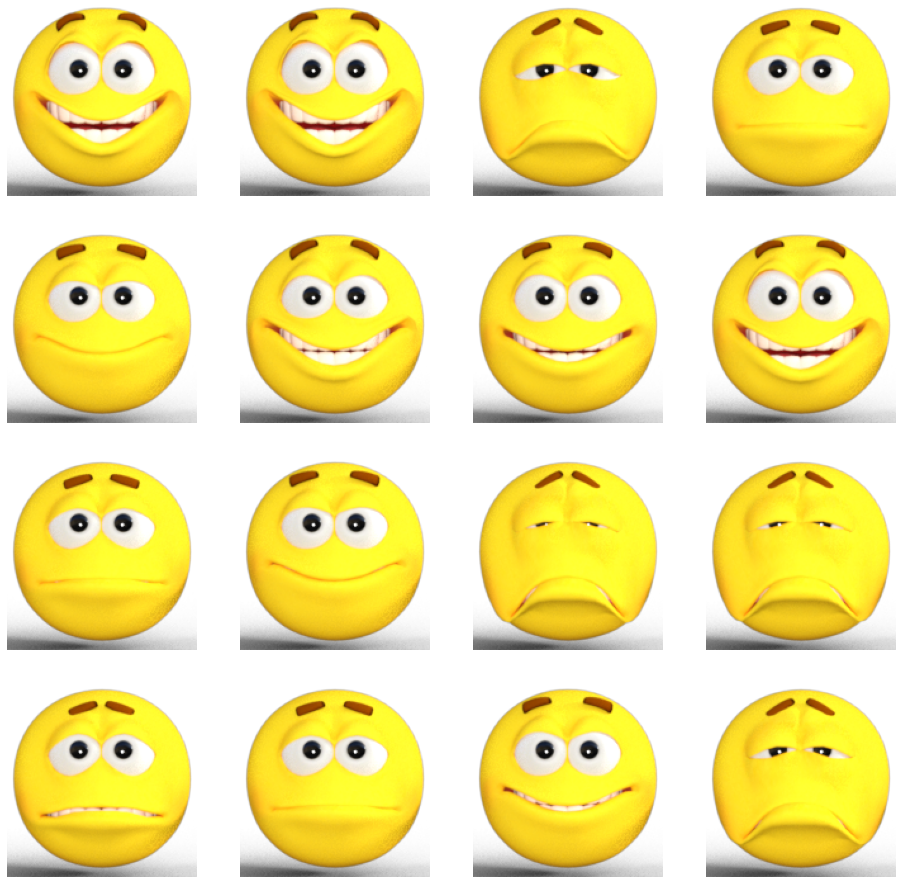

In [ ]:
drarwGridOfImages(train_dir)

In [ ]:
# This Code Block should Define and Compile the Model


# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(width,height, 3)),

    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()



model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])





Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [ ]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                        batch_size=BS,
                                                        class_mode='binary',   #class_mode="categorical" will do one hot encoding
                                                        target_size=(width,height) , color_mode="rgb")          # Your Code Here)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                                  #validation_data=validation_generator,
                                  steps_per_epoch=NUM_TRAIN_IMAGES // BS,   ## 2000 images = batch_size * steps-----steps=images/batch_size
                                  epochs=EPOCHS,
                                  #validation_steps=NUM_TEST_IMAGES // BS,
                                  verbose=1 ,
                                  callbacks=[myCallBack]
                                  )

Epoch 1/20
2/2 [==============================] - 0s 30ms/step - loss: 0.0521 - acc: 0.9792
Epoch 2/20
2/2 [==============================] - 0s 32ms/step - loss: 0.2162 - acc: 0.9531
Epoch 3/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1957 - acc: 0.8750
Epoch 4/20
2/2 [==============================] - 0s 30ms/step - loss: 0.2625 - acc: 0.7969
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0522 - acc: 1.0000


dict_keys(['loss', 'acc'])


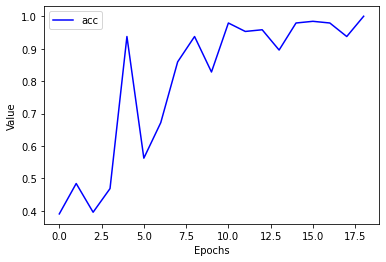

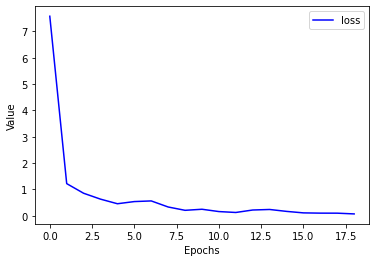

In [ ]:
print(history.history.keys())
pltHistoryCurve(history,"acc")
pltHistoryCurve(history,"loss")


# Cats Vs Dogs using Data Generator

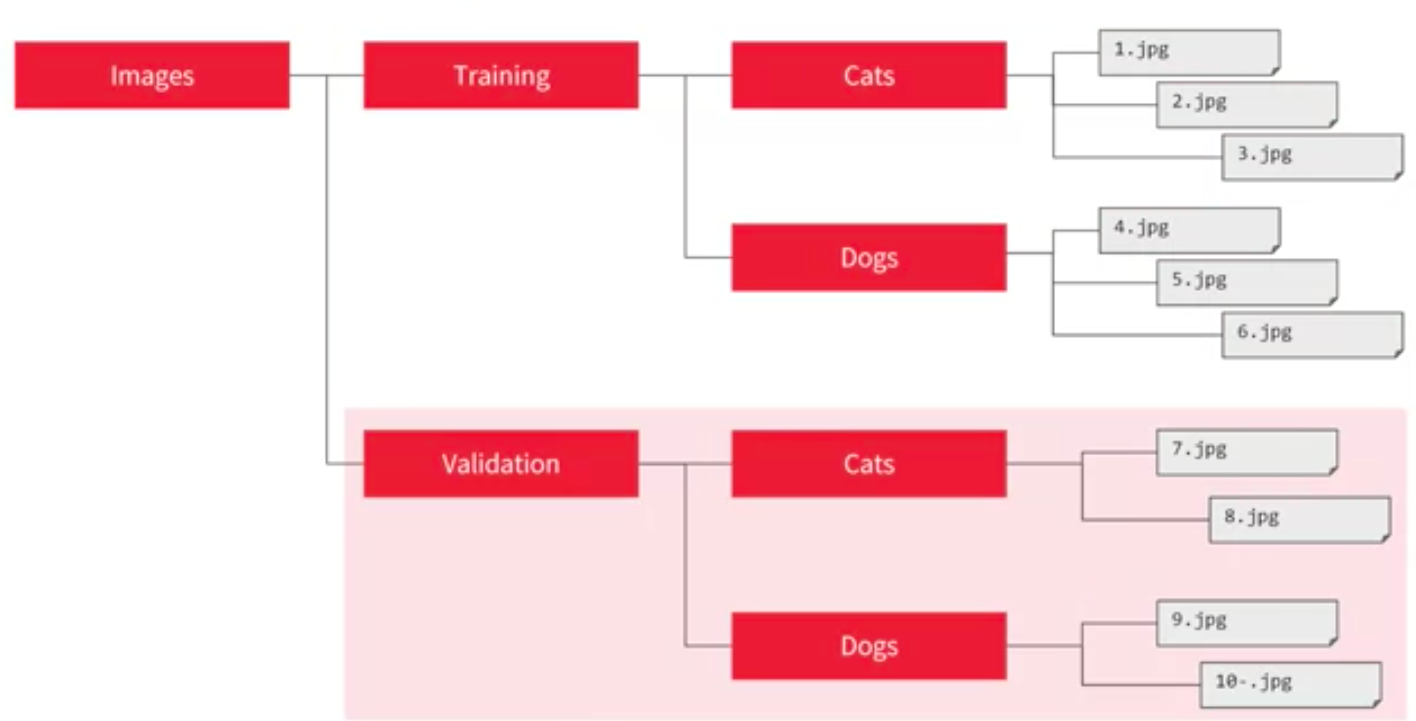

In [ ]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-10-06 14:17:52--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.213.164.137, 2a02:26f0:6b:5a5::e59, 2a02:26f0:6b:5b3::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.213.164.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   115MB/s    in 7.3s    

2020-10-06 14:18:00 (108 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [ ]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'


try:
    #YOUR CODE GOES HERE
  os.mkdir("/tmp/cats-v-dogs/")
  os.mkdir("/tmp/cats-v-dogs/testing")
  os.mkdir("/tmp/cats-v-dogs/training")
  os.mkdir("/tmp/cats-v-dogs/testing/cats")
  os.mkdir("/tmp/cats-v-dogs/training/dogs")
  os.mkdir("/tmp/cats-v-dogs/testing/dogs")  
  os.mkdir("/tmp/cats-v-dogs/training/cats")
except OSError:
  print("error")
  pass

In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
#split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  fileNames=os.listdir(SOURCE)
  random.sample(fileNames, len(fileNames))
  splitIndex=int(SPLIT_SIZE*len(fileNames))
  print(splitIndex)
  traningFileNames=fileNames[0:splitIndex]
  validationFileNames=fileNames[splitIndex:]
  print(len)

  training_length = int(len(fileNames) * SPLIT_SIZE)
  testing_length = int(len(fileNames) - training_length)
  shuffled_set = random.sample(fileNames, len(fileNames))
  traningFileNames = shuffled_set[0:training_length]
  validationFileNames = shuffled_set[-testing_length:]


  for fileName in traningFileNames:
    source=os.path.join(SOURCE,fileName) 
    fileSize=os.path.getsize(source)
    if (fileSize==0):
      print("{}  is zero length, so ignoring".format(fileName))
      continue
    source=os.path.join(SOURCE,fileName) 
    destination=os.path.join(TRAINING,fileName) 
    copyfile(source, destination)
  for fileName in validationFileNames:
    source=os.path.join(SOURCE,fileName) 
    fileSize=os.path.getsize(source)
    if (fileSize==0):
      print("{}  is zero length, so ignoring".format(fileName))
      continue
    source=os.path.join(SOURCE,fileName) 
    destination=os.path.join(TESTING,fileName) 
    copyfile(source, destination)




CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

11250
<built-in function len>
666.jpg  is zero length, so ignoring
11250
<built-in function len>
11702.jpg  is zero length, so ignoring


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11249
11249
1251
1251


In [ ]:
BS=32
width,height=150,150
EPOCHS=50

In [ ]:


model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(width,height, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)            

In [ ]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'


train_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=BS,
                                                        class_mode='binary',   #class_mode="categorical" will do one hot encoding
                                                        target_size=(width,height) , color_mode="rgb")          # Your Code Here)

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )

validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                        batch_size=BS,
                                                        class_mode='binary',   #class_mode="categorical" will do one hot encoding
                                                        target_size=(width,height) , color_mode="rgb")          # Your Code Here)


# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              epochs=EPOCHS,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/50
583/703 [=======================>......] - ETA: 11s - loss: 0.5802 - accuracy: 0.6950

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

703/703 [==============================] - 77s 109ms/step - loss: 0.5680 - accuracy: 0.7057 - val_loss: 0.4569 - val_accuracy: 0.7934
Epoch 2/50
703/703 [==============================] - 74s 105ms/step - loss: 0.4405 - accuracy: 0.7945 - val_loss: 0.4324 - val_accuracy: 0.7966
Epoch 3/50
703/703 [==============================] - 76s 108ms/step - loss: 0.3804 - accuracy: 0.8319 - val_loss: 0.4139 - val_accuracy: 0.8094
Epoch 4/50
703/703 [==============================] - 73s 104ms/step - loss: 0.3273 - accuracy: 0.8613 - val_loss: 0.3969 - val_accuracy: 0.8189
Epoch 5/50
703/703 [==============================] - 73s 103ms/step - loss: 0.2734 - accuracy: 0.8874 - val_loss: 0.4343 - val_accuracy: 0.8369
Epoch 6/50
703/703 [==============================] - 73s 104ms/step - loss: 0.2236 - accuracy: 0.9119 - val_loss: 0.4826 - val_accuracy: 0.8189
Epoch 7/50
703/703 [==============================] - 73s 104ms/step - loss: 0.1760 - accuracy: 0.9339 - val_loss: 0.6711 - val_accuracy: 0.8

In [ ]:
pltHistoryTwoKeys(history,'accuracy','val_accuracy')

In [ ]:
pltHistoryTwoKeys(history,'loss','val_loss')

Text(0.5, 1.0, 'Training and validation loss')

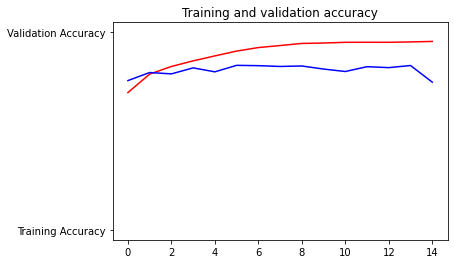

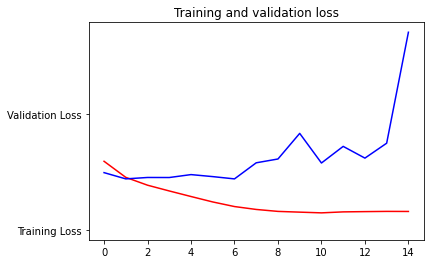

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

# Cats Vs Dogs using Data Generator and Data augmentation

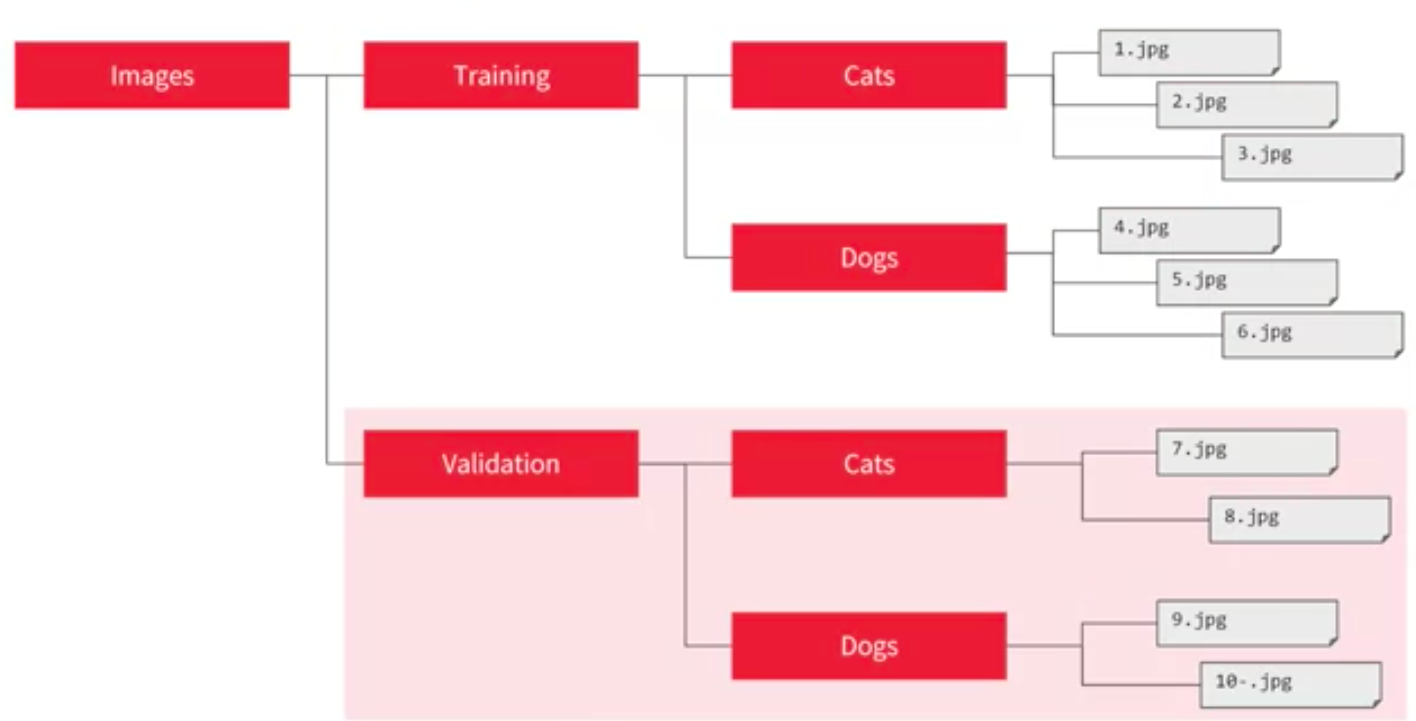

In [1]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-10-06 21:54:41--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.248.137, 2600:1409:12:2af::e59, 2600:1409:12:285::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.36.248.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   166MB/s    in 5.6s    

2020-10-06 21:54:47 (141 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [4]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'


try:
    #YOUR CODE GOES HERE
  os.mkdir("/tmp/cats-v-dogs/")
  os.mkdir("/tmp/cats-v-dogs/testing")
  os.mkdir("/tmp/cats-v-dogs/training")
  os.mkdir("/tmp/cats-v-dogs/testing/cats")
  os.mkdir("/tmp/cats-v-dogs/training/dogs")
  os.mkdir("/tmp/cats-v-dogs/testing/dogs")  
  os.mkdir("/tmp/cats-v-dogs/training/cats")
except OSError:
  print("error")
  pass

In [5]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
#split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  fileNames=os.listdir(SOURCE)
  random.sample(fileNames, len(fileNames))
  splitIndex=int(SPLIT_SIZE*len(fileNames))
  print(splitIndex)
  traningFileNames=fileNames[0:splitIndex]
  validationFileNames=fileNames[splitIndex:]
  print(len)

  training_length = int(len(fileNames) * SPLIT_SIZE)
  testing_length = int(len(fileNames) - training_length)
  shuffled_set = random.sample(fileNames, len(fileNames))
  traningFileNames = shuffled_set[0:training_length]
  validationFileNames = shuffled_set[-testing_length:]


  for fileName in traningFileNames:
    source=os.path.join(SOURCE,fileName) 
    fileSize=os.path.getsize(source)
    if (fileSize==0):
      print("{}  is zero length, so ignoring".format(fileName))
      continue
    source=os.path.join(SOURCE,fileName) 
    destination=os.path.join(TRAINING,fileName) 
    copyfile(source, destination)
  for fileName in validationFileNames:
    source=os.path.join(SOURCE,fileName) 
    fileSize=os.path.getsize(source)
    if (fileSize==0):
      print("{}  is zero length, so ignoring".format(fileName))
      continue
    source=os.path.join(SOURCE,fileName) 
    destination=os.path.join(TESTING,fileName) 
    copyfile(source, destination)




CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

11250
<built-in function len>
666.jpg  is zero length, so ignoring
11250
<built-in function len>
11702.jpg  is zero length, so ignoring


In [6]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11249
11249
1251
1251


In [22]:
BS=32
width,height=150,150
EPOCHS=100

In [8]:


model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(width,height, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [19]:
    augmentationLevel=2
    
    if(augmentationLevel==2):

        train_datagen = ImageDataGenerator(
              rescale=1./255,   #All images will be rescaled by 1./255
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')
        
        
   
    elif(augmentationLevel==1):
        train_datagen = ImageDataGenerator(
        rotation_range=15,
        fill_mode="nearest",
        rescale=1./255, )

    else:    
        train_datagen = ImageDataGenerator(
                  rescale=1./255,   #All images will be rescaled by 1./255
                  )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
        

In [20]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'



train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=BS,
                                                        class_mode='binary',   #class_mode="categorical" will do one hot encoding
                                                        target_size=(width,height) , color_mode="rgb")          # Your Code Here)

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'


validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                        batch_size=BS,
                                                        class_mode='binary',   #class_mode="categorical" will do one hot encoding
                                                        target_size=(width,height) , color_mode="rgb")          # Your Code Here)


# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              epochs=EPOCHS,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/100
599/703 [========================>.....] - ETA: 24s - loss: 0.4678 - accuracy: 0.7901

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

703/703 [==============================] - 184s 262ms/step - loss: 0.4632 - accuracy: 0.7927 - val_loss: 0.4866 - val_accuracy: 0.7710
Epoch 2/100
703/703 [==============================] - 180s 256ms/step - loss: 0.4658 - accuracy: 0.7901 - val_loss: 0.4600 - val_accuracy: 0.7914
Epoch 3/100
703/703 [==============================] - 183s 260ms/step - loss: 0.4586 - accuracy: 0.7942 - val_loss: 0.5052 - val_accuracy: 0.7686
Epoch 4/100
703/703 [==============================] - 183s 260ms/step - loss: 0.4644 - accuracy: 0.7913 - val_loss: 0.4152 - val_accuracy: 0.8193
Epoch 5/100
703/703 [==============================] - 178s 254ms/step - loss: 0.4565 - accuracy: 0.7957 - val_loss: 0.3825 - val_accuracy: 0.8345
Epoch 6/100
703/703 [==============================] - 178s 254ms/step - loss: 0.4691 - accuracy: 0.7918 - val_loss: 0.4506 - val_accuracy: 0.7962
Epoch 7/100
703/703 [==============================] - 176s 251ms/step - loss: 0.4594 - accuracy: 0.7961 - val_loss: 0.3933 - val_

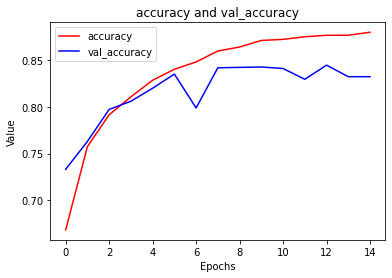

<Figure size 432x288 with 0 Axes>

In [18]:
pltHistoryTwoKeys(history,'accuracy','val_accuracy')

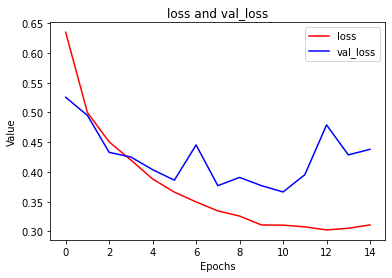

<Figure size 432x288 with 0 Axes>

In [17]:
pltHistoryTwoKeys(history,'loss','val_loss')

#  Horses_vs_humans_using_Transfer_Learning_Question-FINAL

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = # Your Code Here

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  # Your Code Here
  
# Print the model summary
pre_trained_model.summary()

# Expected Output is extremely large, but should end with:

#batch_normalization_v1_281 (Bat (None, 3, 3, 192)    576         conv2d_281[0][0]                 
#__________________________________________________________________________________________________
#activation_273 (Activation)     (None, 3, 3, 320)    0           batch_normalization_v1_273[0][0] 
#__________________________________________________________________________________________________
#mixed9_1 (Concatenate)          (None, 3, 3, 768)    0           activation_275[0][0]             
#                                                                 activation_276[0][0]             
#__________________________________________________________________________________________________
#concatenate_5 (Concatenate)     (None, 3, 3, 768)    0           activation_279[0][0]             
#                                                                 activation_280[0][0]             
#__________________________________________________________________________________________________
#activation_281 (Activation)     (None, 3, 3, 192)    0           batch_normalization_v1_281[0][0] 
#__________________________________________________________________________________________________
#mixed10 (Concatenate)           (None, 3, 3, 2048)   0           activation_273[0][0]             
#                                                                 mixed9_1[0][0]                   
#                                                                 concatenate_5[0][0]              
#                                                                 activation_281[0][0]             
#==================================================================================================
#Total params: 21,802,784
#Trainable params: 0
#Non-trainable params: 21,802,784

In [ ]:
last_layer = pre_trained_model.get_layer(# Your Code Here)
print('last layer output shape: ', last_layer.output_shape)
last_output = # Your Code Here

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(# Your Code Here)(x)
# Add a dropout rate of 0.2
x = layers.Dropout(# Your Code Here)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (# Your Code Here)(x)           

model = Model( # Your Code Here, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = # Your Code Here, 
              metrics = # Your Code Here)

model.summary()

# Expected output will be large. Last few lines should be:

# mixed7 (Concatenate)            (None, 7, 7, 768)    0           activation_248[0][0]             
#                                                                  activation_251[0][0]             
#                                                                  activation_256[0][0]             
#                                                                  activation_257[0][0]             
# __________________________________________________________________________________________________
# flatten_4 (Flatten)             (None, 37632)        0           mixed7[0][0]                     
# __________________________________________________________________________________________________
# dense_8 (Dense)                 (None, 1024)         38536192    flatten_4[0][0]                  
# __________________________________________________________________________________________________
# dropout_4 (Dropout)             (None, 1024)         0           dense_8[0][0]                    
# __________________________________________________________________________________________________
# dense_9 (Dense)                 (None, 1)            1025        dropout_4[0][0]                  
# ==================================================================================================
# Total params: 47,512,481
# Trainable params: 38,537,217
# Non-trainable params: 8,975,264


In [ ]:
# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 
  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = '//tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

In [ ]:
train_horses_dir = # Your Code Here
train_humans_dir = # Your Code Here
validation_horses_dir = # Your Code Here
validation_humans_dir = # Your Code Here

train_horses_fnames = # Your Code Here
train_humans_fnames = # Your Code Here
validation_horses_fnames = # Your Code Here
validation_humans_fnames = # Your Code Here

print(# Your Code Here)
print(# Your Code Here)
print(# Your Code Here)
print(# Your Code Here)

# Expected Output:
# 500
# 527
# 128
# 128

In [ ]:
# Define our example directories and files
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(# Your Code Here)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(# Your Code Here )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(# Your Code Here)     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( # Your Code Here)

# Expected Output:
# Found 1027 images belonging to 2 classes.
# Found 256 images belonging to 2 classes.

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take less than 100 epochs)

callbacks = # Your Code Here
history = model.fit(# Your Code Here)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()